In [1]:
# just so you know where you are :) 
#!conda activate wool_sucking_nn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split

%matplotlib inline

# Table of Contents
[1. The Mission!](#mission)  
[2. Read in "raw" data](#rawdata)  
[3. Drop Problem Columns](#drop1)  
[4. Impute Missing Values (without data leakage!)](#impute)  
[5. Distributions, Duplicates, and Outliers, oh my! (spoiler alert: we're keeping all the target feature outliers)](#distributions)  
[6. The Correlation Chronicles: Gwen Really Likes Heatmaps](#correlations)  
[7. Clean Data at Your Service: Delivering a Spotless CSV File](#clean)

# <a id='mission'></a> 1. The Mission!
Since the debut of ClickClock influencer, BuddyTheCat's adorable wool-sucking performances, the demand for wool-sucking kitties at my client's adoption agency has skyrocketed. Potential adopters are upset that they cannot filter cats up for adoption by this behavior, and it is impractical for this to be assessed during an intake evaluation. So, we want to predict wool-sucking; and this time: with a neural network! 

# <a id='rawdata'></a>  2. Read in "raw" data

I say raw in quotations because this is a dataset from a published study, so it is already pretty clean. It is comprised of the answers to a questionnaire regarding several background and living environment factors as well as "ten behaviour traits: activity level; tendency to seek human contact (labelled as 'contact to people’); aggressiveness towards human family members, strangers, or other cats; shyness towards strangers or novel stimuli; level of self-grooming (labelled as ‘excessive grooming); wool sucking; and owner-evaluated behaviour problem, which were all coded on a 5-point Likert-type scale, except wool sucking, which was coded 1–8 and behaviour problem, which was coded as ‘no behaviour problem’, ‘self-evaluated behaviour problem’, and ‘behaviour problem diagnosed by a veterinarian'."  

Link to published data: [Salonen et al., Breed differences of heritable behaviour traits in cats](https://figshare.com/articles/dataset/Salonen_et_al_Breed_differences_of_heritable_behaviour_traits_in_cats_-_data/8143835)

In [3]:
cat_data = pd.read_excel('..\Data\cat_data.xlsx')

In [4]:
cat_data.head()

,ID_number,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,...,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
0,1,4.0274,2,1,BEN,8,0,1,4,5,...,1,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318
1,2,2.1096,2,1,BEN,8,0,1,5,4,...,1,1,3,3,1.0,0.0,1.0,-0.633626,1.419777,0.994083
2,3,7.6822,1,1,BUR,4,0,1,4,5,...,1,1,2,1,4.0,3.0,2.0,-0.392731,-0.364198,0.666318
3,4,5.0027,1,1,BUR,4,4,0,5,5,...,1,2,1,1,1.0,0.0,1.0,0.090309,-0.780989,1.330449
4,5,5.0137,1,1,EUR,4,5,1,4,5,...,1,1,2,1,1.0,0.0,1.0,-0.392731,-0.364198,0.666318


In [5]:
cat_data.describe()

,ID_number,Age,Gender,Neuter_status,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
count,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5726.000000,5683.000000,5696.000000,5719.000000,5726.000000,5726.000000,5.726000e+03
mean,2863.500000,4.753083,1.538945,0.779776,4.618407,2.546455,0.847363,3.771743,4.089067,1.116312,1.096577,1.584177,2.026546,1.884736,1.794123,0.912395,1.070467,-0.000003,-0.000003,-1.359264e-07
std,1653.098152,3.769304,0.498525,0.414434,1.576421,1.910538,0.359669,0.864301,0.878921,0.417632,0.368069,0.840766,0.996585,1.051672,0.998514,1.544499,0.384330,0.896939,0.999784,9.768488e-01
min,1.000000,0.167100,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.964370,-2.433800,-4.061199e+00
25%,1432.250000,1.789000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-0.448792,-0.780989,-6.867931e-01
50%,2863.500000,3.879450,2.000000,1.000000,4.000000,2.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,-0.330445,-0.175096,-1.865431e-03
75%,4294.750000,6.778100,2.000000,1.000000,5.000000,5.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,0.072477,0.497528,7.201160e-01
max,5726.000000,24.811000,2.000000,1.000000,8.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,3.000000,9.644858,3.577881,1.997650e+00


Looks like there are 5726 records. Most columns are not missing values (yay!), but some very important ones are: Grooming (highly predictive of Wool_sucking according to Cat-pstone 1 results), Wool_sucking (aka our target feature), and Behaviour_problem (also found to be highly predictive of Wool-sucking).  

HOWEVER: If you've seen Cat-pstone 1, you may know that I have some reservations about including Behaviour_problem. Through my research during this and the previous project, I found that some individuals (definitely pre-BuddyTheCat era, I'm sure) consider wool-sucking to be behavior problem. The study does not specify what is considered a behavior problem, only their rating scale method. I assume our intake evaluators also would have a hard time with this subjective distinction, so **I will not include Behaviour_problem in my predictive features.** 

## 2.1 Drop Duplicates

In [6]:
# check for duplicates before we drop a bunch of columns
duplicates = cat_data.duplicated(subset=(cat_data.drop(columns=['ID_number']).columns))
print(cat_data[duplicates].shape)
cat_data[duplicates].sort_values('Age')

(31, 21)


,ID_number,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,...,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
4734,4735,0.1671,1,0,BRI,8,0,1,4,3,...,1,2,2,2,1.0,0.0,1.0,-0.092896,0.112752,-0.483499
5442,5443,0.2055,2,0,KOR,8,0,0,4,4,...,1,1,2,1,1.0,0.0,1.0,-0.420295,-0.360407,0.048010
5441,5442,0.2055,2,0,KOR,8,0,0,4,4,...,1,1,2,1,1.0,0.0,1.0,-0.420295,-0.360407,0.048010
5480,5481,0.2137,1,0,KOR,8,0,1,5,5,...,1,1,1,1,1.0,0.0,1.0,-0.330445,-0.734536,1.297448
5479,5480,0.2137,1,0,KOR,8,0,1,5,5,...,1,1,1,1,1.0,0.0,1.0,-0.330445,-0.734536,1.297448
5481,5482,0.2137,1,0,KOR,8,0,1,5,5,...,1,1,1,1,1.0,0.0,1.0,-0.330445,-0.734536,1.297448
2530,2531,0.2301,1,0,SIB,4,0,1,3,3,...,1,1,2,2,1.0,0.0,1.0,-0.503919,-0.029896,-1.251303
3032,3033,0.2521,1,0,ORI,8,5,1,5,5,...,1,1,1,1,1.0,0.0,1.0,-0.330445,-0.734536,1.297448
5110,5111,0.2521,1,0,other,4,0,0,5,5,...,1,1,1,1,1.0,0.0,1.0,-0.330445,-0.734536,1.297448
5424,5425,0.3233,1,0,NFO,5,3,1,4,4,...,1,1,1,1,1.0,0.0,1.0,-0.348278,-0.919846,-0.055663


I genuinely did not expect there to be any duplicates because I didn't even think to *not* include the ID number in Cat-pstone 1. I think it is highly unlikely that over ALL of these features, there is more than one kitty that has that set of values. 

In [7]:
# me double checking that this is accurate because it is just whacky that this dataset
# came from a published paper and has duplicates
cat_data.loc[(cat_data['Age'] == 0.1671) & (cat_data['Breed_group'] == 'BRI')]

,ID_number,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,...,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component
4729,4730,0.1671,1,0,BRI,8,0,1,4,3,...,1,2,2,2,1.0,0.0,1.0,-0.092896,0.112752,-0.483499
4734,4735,0.1671,1,0,BRI,8,0,1,4,3,...,1,2,2,2,1.0,0.0,1.0,-0.092896,0.112752,-0.483499


In [8]:
# drop duplicates
cat_data = cat_data[~duplicates]

duplicates2 = cat_data.duplicated(subset=(cat_data.drop(columns=['ID_number']).columns))
print(cat_data[duplicates2].shape)
cat_data[duplicates2].sort_values('Age')

(0, 21)


,ID_number,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,...,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem,Aggression_component,Shyness_component,Extraversion_component


# <a id='drop1'></a>  3. Drop Problem Columns and Rows

In [9]:
# dropping PCA components from study and ID, 
# also weaning_age, since it would be impossible to get that information for almost any cat that wasn't weaned at the facility 
cat_data.drop(columns=['Behaviour_problem', 
                       'Aggression_component', 
                       'Shyness_component', 
                       'Extraversion_component', 
                       'ID_number', 
                       'Weaning_age'], inplace=True)

In [10]:
cat_data.dropna(subset=['Wool_sucking'], inplace=True)
cat_data.describe()

,Age,Gender,Neuter_status,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5624.000000,5665.000000
mean,4.770624,1.539982,0.782701,2.548279,0.848014,3.766814,4.087732,1.117034,1.097087,1.586231,2.029479,1.887732,1.798009,0.916328
std,3.766739,0.498443,0.412444,1.909547,0.359039,0.864287,0.878514,0.419217,0.369331,0.840169,0.997355,1.053025,0.999069,1.546726
min,0.167100,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.808200,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,3.906800,2.000000,1.000000,2.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
75%,6.786300,2.000000,1.000000,5.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000
max,24.811000,2.000000,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000


# <a id='distributions'></a>  4. Distributions and Outliers, oh my! (spoiler alert: we're keeping all the target feature outliers) 

## 4.1 Distributions:

1 = not at all  
2 = a little  
3 = moderately  
4 = a lot  
5 = very much  

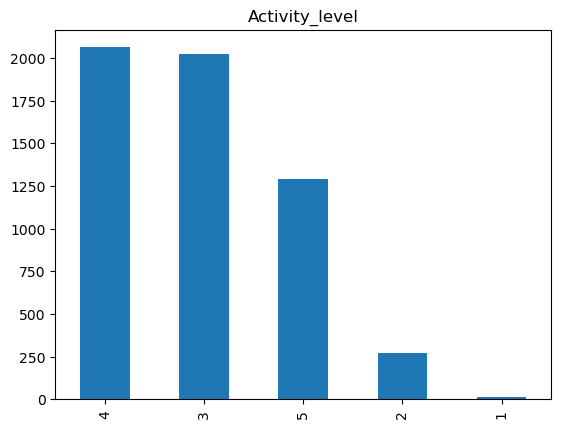

4    0.363989
3    0.357282
5    0.228067
2    0.048014
1    0.002648
Name: Activity_level, dtype: float64


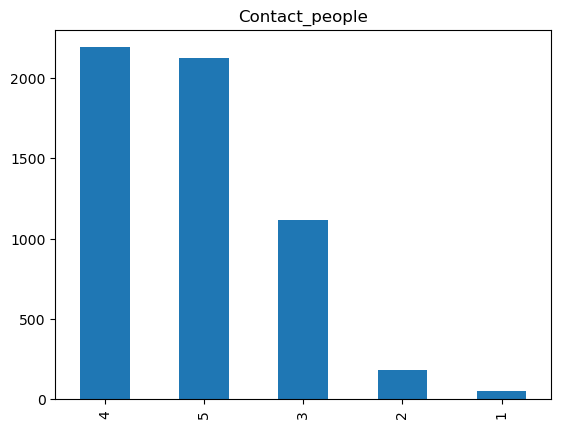

4    0.386584
5    0.375287
3    0.197529
2    0.031774
1    0.008826
Name: Contact_people, dtype: float64


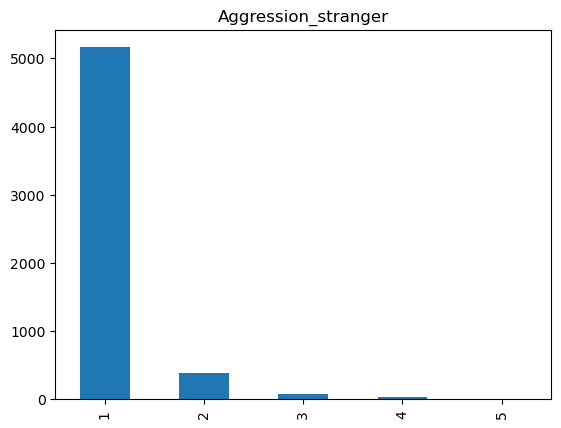

1    0.910856
2    0.068667
3    0.013945
4    0.005649
5    0.000883
Name: Aggression_stranger, dtype: float64


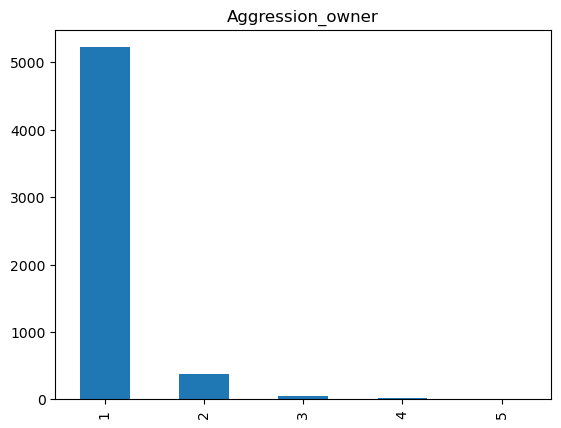

1    0.921271
2    0.065313
3    0.009532
4    0.002824
5    0.001059
Name: Aggression_owner, dtype: float64


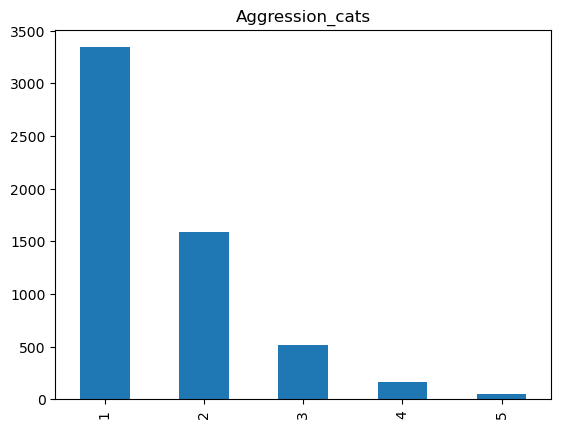

1    0.589938
2    0.280494
3    0.091792
4    0.028950
5    0.008826
Name: Aggression_cats, dtype: float64


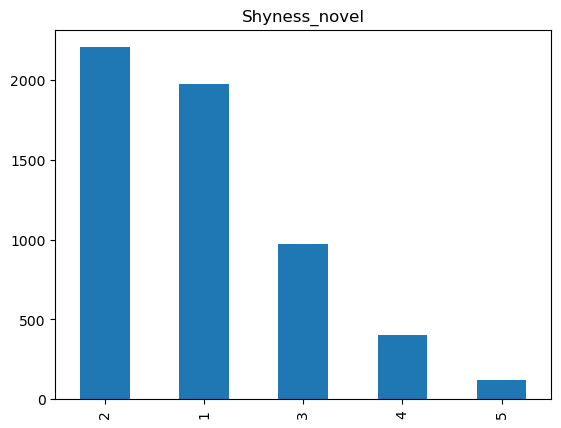

2    0.388703
1    0.347749
3    0.171403
4    0.070609
5    0.021536
Name: Shyness_novel, dtype: float64


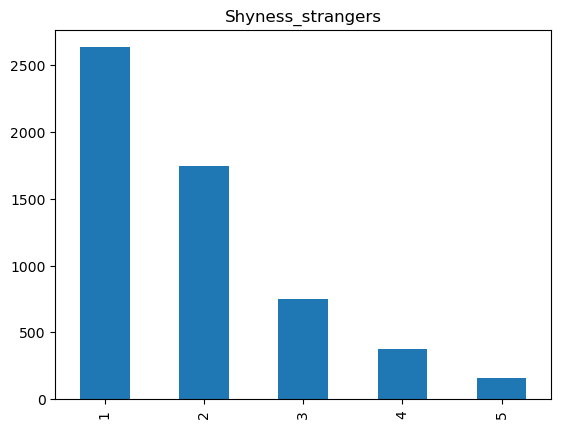

1    0.464078
2    0.308208
3    0.132215
4    0.066902
5    0.028597
Name: Shyness_strangers, dtype: float64


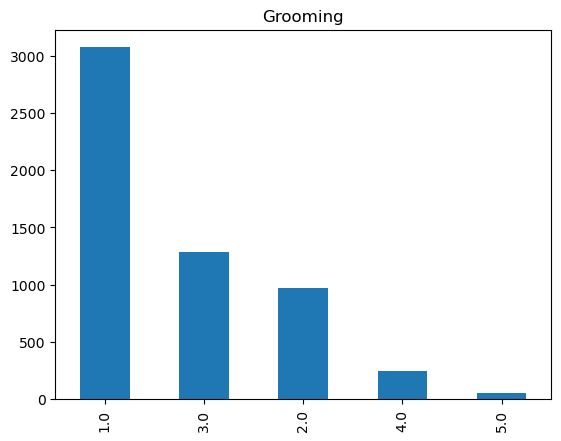

1.0    0.546764
3.0    0.227952
2.0    0.171942
4.0    0.043208
5.0    0.010135
Name: Grooming, dtype: float64


In [11]:
# create barcharts for all the 1-5 scaled columns 
likert_5_columns = ['Activity_level', 'Contact_people', 'Aggression_stranger', 
                   'Aggression_owner', 'Aggression_cats', 'Shyness_novel', 'Shyness_strangers', 'Grooming']


#NOTE: Activity_level was 4th worst/31 predictive features in Cat-pstone 1, we may drop this from the final training set

for column in likert_5_columns:
    
    cat_data[column].value_counts().plot.bar()
    
    plt.title(column)
    
    plt.show()
    print(cat_data[column].value_counts(normalize=True))

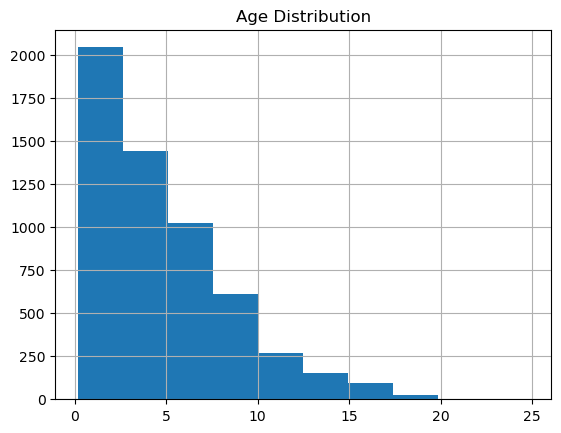

In [12]:
# Age, in years
# NOTE: Age was 5th worst/31 predictive features in Cat-pstone 1, we may drop this from the final training set
cat_data['Age'].hist()
plt.title('Age Distribution');

2    0.539982
1    0.460018
Name: Gender, dtype: float64

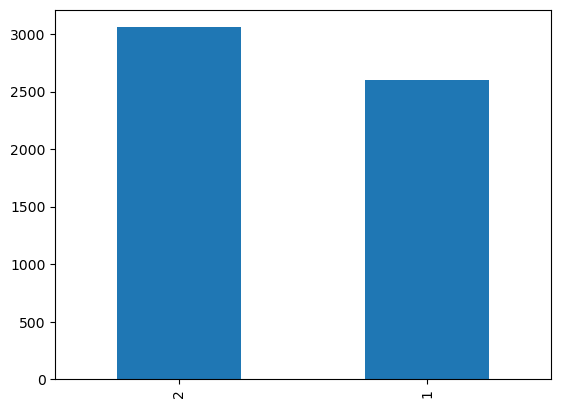

In [13]:
# Gender, pretty close to 50/50, 1=male, 2=female
# NOTE: Gender was 2nd worst/31 predictive features, may drop from final training set
cat_data.Gender.value_counts().plot.bar();
cat_data.Gender.value_counts(normalize=True)

1    0.782701
0    0.217299
Name: Neuter_status, dtype: float64

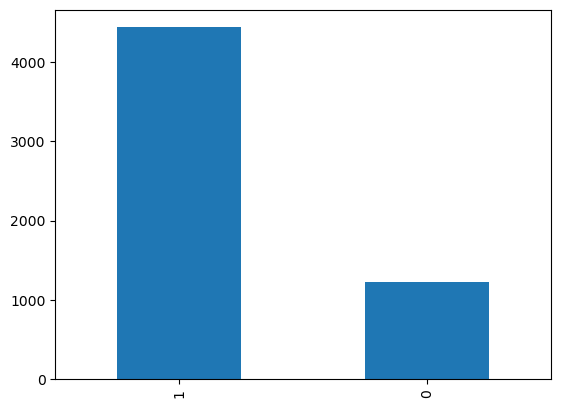

In [14]:
# Neuter status, 0=intact, 1=neutered
cat_data.Neuter_status.value_counts().plot.bar()
cat_data.Neuter_status.value_counts(normalize=True)

Breed_group: ABY = Abyssinian, Somali, and Ocicat BEN = Bengal BRI = British Shorthair BUR = Burmese and Burmilla CRX = Cornish Rex DRX = Devon Rex EUR = European Shorthair HCS = house cat KOR = Korat MCO = Maine Coon NFO = Norwegian Forest Cat ORI = Balinese, Oriental Longhair, Oriental Shorthair, Seychellois Longhair, Seychellois Shorthair, and Siamese PER = Persian and Exotic RAG = Ragdoll RUS = Russian Blue SBI = Saint Birman SIB = Siberian and Neva Masquerade TUV = Turkish Van and Angora other = other breeds

HCS      0.147043
ABY      0.068844
other    0.067608
MCO      0.055958
RAG      0.054016
ORI      0.054016
SIB      0.052074
CRX      0.051898
NFO      0.051898
SBI      0.051368
BUR      0.048544
RUS      0.047132
BRI      0.042718
BEN      0.039365
PER      0.039365
DRX      0.036717
EUR      0.032304
TUV      0.029656
KOR      0.029479
Name: Breed_group, dtype: float64

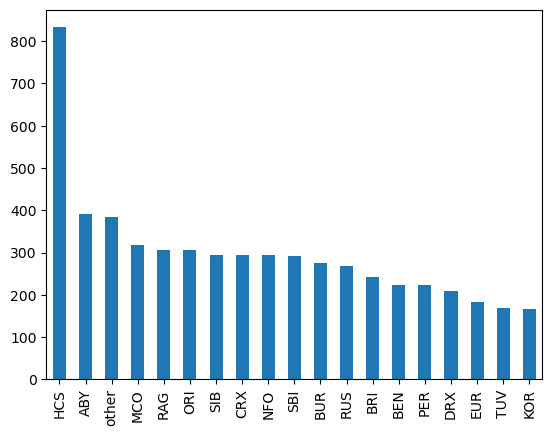

In [15]:
# I am not sure how housecat and other differ
cat_data.Breed_group.value_counts().plot.bar()
cat_data.Breed_group.value_counts(normalize=True)

5    0.260724
1    0.224007
0    0.186231
4    0.134157
2    0.100618
3    0.094263
Name: Outdoors, dtype: float64

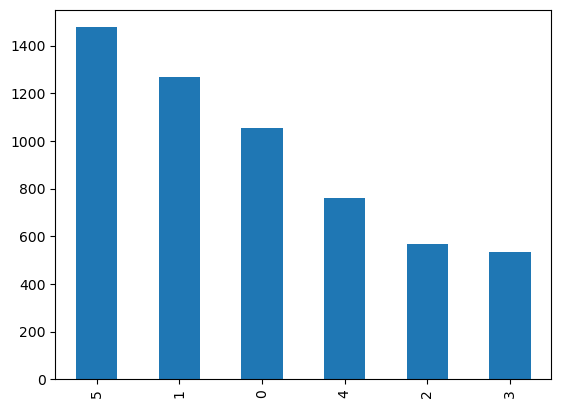

In [16]:
# outdoors, 0 = never, 1 = few times a year, 2 = 1-2 times a month, 3 = 1-2 times a week, 4 = 3-5 times a week, 5 = daily
cat_data.Outdoors.value_counts().plot.bar()
cat_data.Outdoors.value_counts(normalize=True)

1    0.848014
0    0.151986
Name: Other_cats, dtype: float64

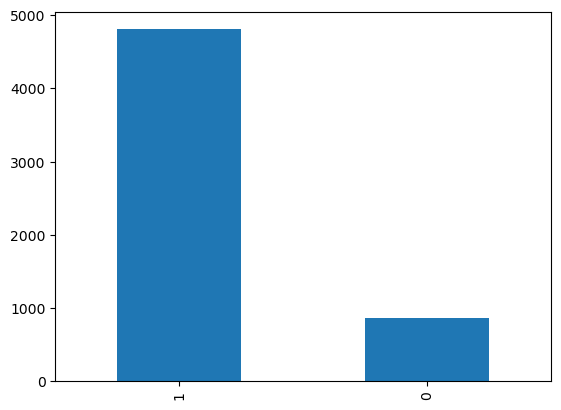

In [17]:
# other cats, Are there other cats in the household? 0 = no, 1 = yes
cat_data.Other_cats.value_counts().plot.bar()
cat_data.Other_cats.value_counts(normalize=True)

0.0    0.681730
4.0    0.074139
2.0    0.070962
3.0    0.066726
1.0    0.064960
5.0    0.036540
6.0    0.004590
7.0    0.000353
Name: Wool_sucking, dtype: float64

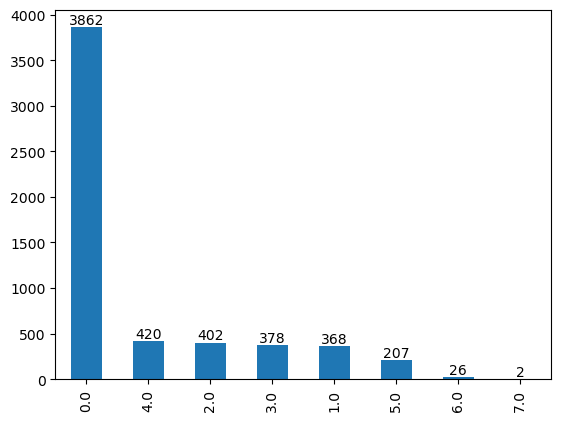

In [18]:
# wool sucking, 0 = never, 1 = 1-3 times in the cat's lifetime, 2 = 1-12 times a year, 3 = 1-4 times a month
# 4 = 1-3 times a week, 5 = daily, 6 = many times per day, 7 = most of the day
# NOTE: binarizing due to HUGE class imbalance
ax = cat_data.Wool_sucking.value_counts().plot.bar()

# add counts to bar graphs
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
cat_data.Wool_sucking.value_counts(normalize=True)

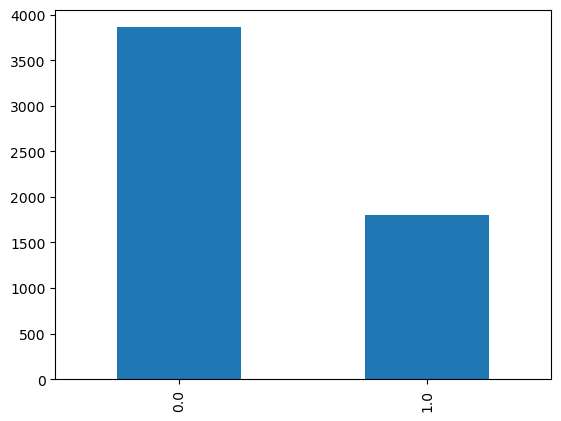

In [19]:
# slightly less class imbalance and a glimpse of  a chance to actually make this neural network work 
cat_data['Wool_sucking_binary'] = cat_data['Wool_sucking'].replace([2, 3, 4, 5, 6, 7], [1, 1, 1, 1, 1, 1])

cat_data['Wool_sucking_binary'].value_counts().plot.bar()
cat_data.Wool_sucking_binary.value_counts(normalize=True)

plt.show()

# <a id='impute'></a>  5. Impute Missing Values (without data leakage!)
Technically I introduced a little data leakage in Cat-pstone 1 by imputing missing values prior to splitting my data into training and testing. I don't think the actual value (median) will be different, but for the matter of principle. 

In [20]:
X = cat_data.drop(columns=['Wool_sucking', 'Wool_sucking_binary'])
y = cat_data['Wool_sucking_binary']

# remember to use this random state later when splitting and imputing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
grooming_median = X_train['Grooming'].median()
X_train['Grooming'] = X_train['Grooming'].fillna(grooming_median)
X_test['Grooming'] = X_test['Grooming'].fillna(grooming_median)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 2407 to 4357
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3965 non-null   float64
 1   Gender               3965 non-null   int64  
 2   Neuter_status        3965 non-null   int64  
 3   Breed_group          3965 non-null   object 
 4   Outdoors             3965 non-null   int64  
 5   Other_cats           3965 non-null   int64  
 6   Activity_level       3965 non-null   int64  
 7   Contact_people       3965 non-null   int64  
 8   Aggression_stranger  3965 non-null   int64  
 9   Aggression_owner     3965 non-null   int64  
 10  Aggression_cats      3965 non-null   int64  
 11  Shyness_novel        3965 non-null   int64  
 12  Shyness_strangers    3965 non-null   int64  
 13  Grooming             3965 non-null   float64
dtypes: float64(2), int64(11), object(1)
memory usage: 464.6+ KB
None
<class 'pandas.core.

# <a id='correlations'></a>  6. The Correlation Chronicles

In [22]:
wool_sucking_corr = {}

for column in X_train.drop(columns=['Age']).columns:
    cross_tab = pd.crosstab(y_train, X_train[column])
    chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)
    wool_sucking_corr[column] = (round(chi2, 3), round(p_value,3))
    print(column, round(chi2,3), round(p_value,3))    

Gender 2.655 0.103
Neuter_status 21.63 0.0
Breed_group 110.927 0.0
Outdoors 55.14 0.0
Other_cats 9.169 0.002
Activity_level 12.42 0.014
Contact_people 8.033 0.09
Aggression_stranger 31.009 0.0
Aggression_owner 24.3 0.0
Aggression_cats 32.88 0.0
Shyness_novel 59.445 0.0
Shyness_strangers 22.139 0.0
Grooming 208.13 0.0


In [23]:
filtered_wool_corr = {k: v for k, v in wool_sucking_corr.items() if v[1] < 0.05}
                                                        # sorting based on first element of the value tuple, reverse=desc
sorted_wool_corr = dict(sorted(filtered_wool_corr.items(), key=lambda x: x[1][0], reverse=True))

for k, v in sorted_wool_corr.items():
    print(k, v)

Grooming (208.13, 0.0)
Breed_group (110.927, 0.0)
Shyness_novel (59.445, 0.0)
Outdoors (55.14, 0.0)
Aggression_cats (32.88, 0.0)
Aggression_stranger (31.009, 0.0)
Aggression_owner (24.3, 0.0)
Shyness_strangers (22.139, 0.0)
Neuter_status (21.63, 0.0)
Activity_level (12.42, 0.014)
Other_cats (9.169, 0.002)


In [24]:
significant_corr_set = set(sorted_wool_corr.keys())
wool_sucking_corr_set = set(wool_sucking_corr.keys())

result_set = wool_sucking_corr_set - significant_corr_set
print(result_set)

{'Contact_people', 'Gender'}


Contact with people and gender did not make the cut in terms of being correlated with wool sucking, and activity level barely made the cut. I will probably not include these in my final set of predictors. 

In [25]:
# pointbiserial for corr between continuous (we'll treat ordinal as continuous here) and dichotomous
wool_sucking_corr2 = {}
for column in X_train.drop(columns=['Breed_group', 'Gender', 'Neuter_status', 'Other_cats']).columns:
    corr_coef, p_val = stats.pointbiserialr(y_train, X_train[column])
    wool_sucking_corr2[column] = (round(corr_coef, 3), round(p_val,3))
    print(column, round(corr_coef,3), round(p_val,3))    

Age -0.065 0.0
Outdoors -0.058 0.0
Activity_level 0.048 0.003
Contact_people 0.036 0.022
Aggression_stranger 0.054 0.001
Aggression_owner 0.07 0.0
Aggression_cats 0.069 0.0
Shyness_novel 0.1 0.0
Shyness_strangers 0.065 0.0
Grooming 0.223 0.0


In [26]:
filtered_wool_corr = {k: v for k, v in wool_sucking_corr2.items() if v[1] < 0.05}
                                                        # sorting based on first element of the value tuple, reverse=desc
sorted_wool_corr = dict(sorted(filtered_wool_corr.items(), key=lambda x: abs(x[1][0]), reverse=True))

for k, v in sorted_wool_corr.items():
    print(f"{k}: {v}")

Grooming: (0.223, 0.0)
Shyness_novel: (0.1, 0.0)
Aggression_owner: (0.07, 0.0)
Aggression_cats: (0.069, 0.0)
Age: (-0.065, 0.0)
Shyness_strangers: (0.065, 0.0)
Outdoors: (-0.058, 0.0)
Aggression_stranger: (0.054, 0.001)
Activity_level: (0.048, 0.003)
Contact_people: (0.036, 0.022)


Will not be including the following columns, and I'm being far pickier than I was in Cat-pstone 1 because I'm concerned about training time with a neural network with so many inputs on my little machine:
* Gender: no seeming correlation between gender and wool_sucking
* Age: doesn't seem to be super correlated with wool-sucking, and wasn't very predictive in Cat-pstone 1 
* Contact_people: the p-value for this was too high to show a relationship between this and the target feature with this dataset
* Activity_level: low predictive power in Cat-pstone 1 and low correlation with target feature based on pointbiserialr
* Aggression_stranger: low-ish predictive power in Cat-pstone 1 (although it was aggregated with aggression_owner in that dataset) 
* Outdoors: low predictive Cat 1, low corr with target
* Other_cats: 3rd lowest predictive power in cat 1, low chi2 score with target

Might drop even more later depending on training time, anything less than shyness_novel's score will be dropped too. 

In [27]:
# technically age is the only column that would make sense to check for outliers other than looking at bar charts 
# as it is the only truly continuous column, anything too sus with the other columns would've shown up in the bar charts

# Calculate the IQR for the 'Age' column
Q1 = cat_data['Age'].quantile(0.25)
Q3 = cat_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the 'Age' column using the IQR method
outliers = (cat_data['Age'] < (Q1 - 1.5 * IQR)) | (cat_data['Age'] > (Q3 + 1.5 * IQR))

# Filter rows with outliers in the 'Age' column
rows_with_outliers = cat_data[outliers]

rows_with_outliers

,Age,Gender,Neuter_status,Breed_group,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Wool_sucking_binary
52,17.6932,2,1,HCS,2,1,2,2,1,1,1,1,1,1.0,0.0,0.0
74,14.5041,1,1,SBI,1,0,4,4,1,1,4,4,4,1.0,0.0,0.0
92,16.5616,1,1,HCS,1,0,3,3,1,1,2,2,2,3.0,1.0,1.0
124,15.1041,2,1,HCS,3,1,2,4,1,1,1,1,1,2.0,0.0,0.0
149,16.3123,2,1,HCS,4,1,3,5,1,1,2,1,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,18.6658,1,1,ABY,3,1,4,5,1,1,2,2,2,1.0,3.0,1.0
5640,24.8110,1,1,other,0,1,3,3,1,1,1,3,3,1.0,0.0,0.0
5642,16.2712,2,1,other,5,1,3,4,1,1,3,1,1,2.0,0.0,0.0
5651,16.3288,1,0,ABY,3,1,4,4,1,1,1,2,2,1.0,0.0,0.0


Mostly the old kitties!

In [28]:
rows_with_outliers['Age'].describe()

count    159.000000
mean      16.275143
std        1.585697
min       14.263000
25%       15.097250
50%       16.024700
75%       16.841100
max       24.811000
Name: Age, dtype: float64

In [29]:
rows_with_outliers.groupby('Wool_sucking')['Age'].count()

Wool_sucking
0.0    124
1.0     14
2.0      8
3.0      6
4.0      5
5.0      1
6.0      1
Name: Age, dtype: int64

I know it's probably not best practice, but I am concerned about losing any regular or extreme suckers (weekly or more often, 4+). And I already have such a small dataset, I'm just not going to risk losing more information. 

# <a id='clean'></a>  7. Clean Data at Your Service

In [30]:
# drop all the columns
columns_to_drop = ['Gender', 'Age', 'Contact_people', 'Activity_level', 'Aggression_stranger', 'Outdoors', 'Other_cats']

for subset in [X_train, X_test]:
    print(subset.shape)
    subset.drop(columns=columns_to_drop, inplace=True)
    print(subset.shape)

(3965, 14)
(3965, 7)
(1700, 14)
(1700, 7)


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 2407 to 4357
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Neuter_status      3965 non-null   int64  
 1   Breed_group        3965 non-null   object 
 2   Aggression_owner   3965 non-null   int64  
 3   Aggression_cats    3965 non-null   int64  
 4   Shyness_novel      3965 non-null   int64  
 5   Shyness_strangers  3965 non-null   int64  
 6   Grooming           3965 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 247.8+ KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 2623 to 3106
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Neuter_status      1700 non-null   int64  
 1   Breed_group        1700 non-null   object 
 2   Aggression_owner   1700 non-null   int64  
 3   Aggression_cats    1700 non-null   int64  
 4   Shyness_novel      1700 non-null   int64  
 5   Shyness_strangers  1700 non-null   int64  
 6   Grooming           1700 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 106.2+ KB


In [33]:
# save the X and y train/tests to csv
cleaned_and_split_data = {'X_train': X_train, 
                        'X_test': X_test, 
                        'y_train':y_train, 
                        'y_test':y_test, 
                         }

In [34]:
with pd.ExcelWriter('..\Data\cleaned_and_split_data.xlsx') as writer:
    for name, df in cleaned_and_split_data.items():
        df.to_excel(writer, sheet_name=name, index=False)